
<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Three: Classifier training and performance assessment. </h2>	

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Split the data into a training set, and test set 
def df_train_test_split(df):
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    return X_train, X_test, y_train, y_test

# Calculate the accuracy percentage of the predicted values
def accuracy(pred, actual):
    return accuracy_score(pred, actual)

# Fit model
def fit_predict(model):
    model.fit(X_train, y_train)
    y_predict_on_train = model.predict(X_train)
    y_predict_on_test = model.predict(X_test)
    accuracy_on_train = accuracy(y_predict_on_train, y_train)
    accuracy_on_test = accuracy(y_predict_on_test, y_test)
    
    y_predict_train.append(y_predict_on_train)
    y_predict_test.append(y_predict_on_test)
    accuracy_train.append(accuracy_on_train)
    accuracy_test.append(accuracy_on_test)
    classifier.append(model)
    
    print(".", end="")

### Data

In [3]:
# Read data from nb2
feature = pd.read_hdf("feature.h5", "data")
print("feature", feature.shape)
feature.head()

feature (1501, 19)


,Encoding,size,mean_channel0,mean_channel1,mean_channel2,std_channel0,std_channel1,std_channel2,avg_red,avg_green,avg_blue,aspect_ratio,dog,avg_y,avg_cb,avg_cr,std_y,std_cb,std_cr
0,0.0,195816,183.355727,176.750337,149.151581,56.406650,64.039966,79.648356,183.355727,176.750337,149.151581,0.412060,0.141087,166.791454,114.899119,132.872500,53.495949,14.785483,10.842560
1,0.0,221352,210.739822,189.280101,164.805242,55.293247,74.486619,70.417988,210.739822,189.280101,164.805242,0.458853,0.062046,181.672576,114.069423,139.173623,56.847182,6.279454,17.758453
2,0.0,194535,170.123787,147.788681,111.753798,64.391428,68.085443,89.914294,170.123787,147.788681,111.753798,0.419847,0.146858,145.131762,108.862326,140.383809,56.089846,25.872970,18.981218
3,0.0,200430,152.159752,132.648316,77.917303,64.525514,62.769907,83.412773,152.159752,132.648316,77.917303,0.432570,0.251385,129.573314,101.069227,140.479025,53.570175,22.471181,15.575221
4,0.0,208560,147.397886,150.504790,86.252963,73.855439,71.385855,94.391311,147.397886,150.504790,86.252963,0.445570,0.172066,138.168607,100.240106,131.224743,62.001119,26.996674,7.072335


In [4]:
# Split the data
X_train, X_test, y_train, y_test = df_train_test_split(feature)
print("X_train", X_train.shape)
print("X_test", X_train.shape)
print("y_train", y_test.shape)
print("y_test", y_test.shape)

X_train (1200, 18)
X_test (1200, 18)
y_train (301,)
y_test (301,)


<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []

Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=0.1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=10, max_iter=5000)
fit_predict(Logistic)

Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=0.1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=10, max_iter=5000)
fit_predict(Logistic)

Logistic = LogisticRegression(random_state=42, penalty='l1', C=0.1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, penalty='l1', C=1, max_iter=5000)
fit_predict(Logistic)
Logistic = LogisticRegression(random_state=42, penalty='l1', C=10, max_iter=5000)
fit_predict(Logistic)

.........

In [6]:
logistic = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
logistic.head()

,accuracy_train,accuracy_test,classifier
0,0.318333,0.335548,"LogisticRegression(C=0.1, class_weight=None, d..."
1,0.318333,0.315615,"LogisticRegression(C=1, class_weight=None, dua..."
2,0.316667,0.315615,"LogisticRegression(C=10, class_weight=None, du..."
3,0.313333,0.322259,"LogisticRegression(C=0.1, class_weight=None, d..."
4,0.239167,0.249169,"LogisticRegression(C=1, class_weight=None, dua..."


In [7]:
for i in range(len(classifier)):
    logistic_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    logistic_y_predict.to_hdf("NB3_df/logistic_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
logistic_y_predict.head()

,pred,actual
0,9.0,18.0
1,9.0,18.0
2,4.0,18.0
3,12.0,18.0
4,6.0,18.0


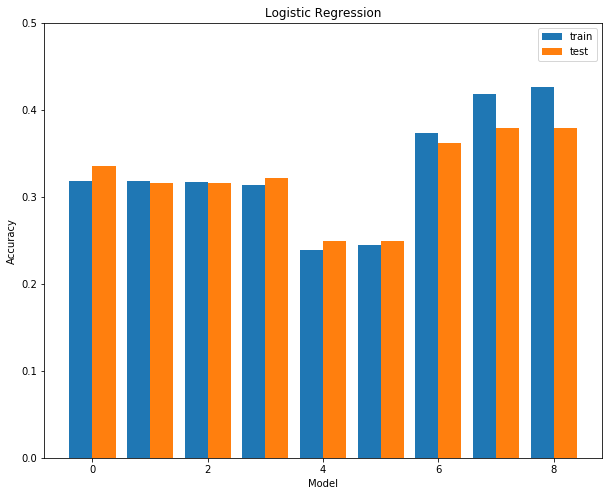

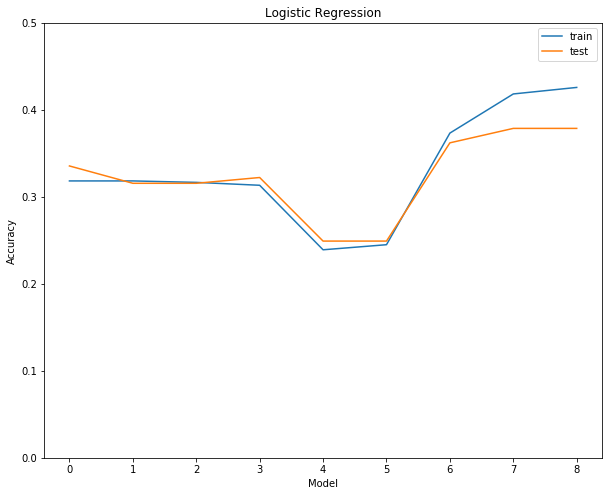

In [8]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(logistic)) - 0.2, logistic.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(logistic)) + 0.2, logistic.accuracy_test, width=0.4, align='center')

plt.title("Logistic Regression")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.5)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Logistic1.jpg")
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(logistic)), logistic.accuracy_train)
plt.plot(np.arange(len(logistic)), logistic.accuracy_test)
plt.title("Logistic Regression")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.5)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Logistic2.jpg")

In [9]:
max_pos = np.argmax(logistic.accuracy_test.values)
print("Best accuracy on test: {}".format(logistic.classifier[max_pos]))
print("Train accuracy: {}".format(logistic.accuracy_train[max_pos]))
print("Test accuracy: {}".format(logistic.accuracy_test[max_pos]))

Best accuracy on test: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train accuracy: 0.41833333333333333
Test accuracy: 0.3787375415282392


### K-nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_train = []
accuracy_test = []
classifier = []

n_neighbors = np.arange(5, 500, 10)
for k in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    fit_predict(KNN)

..................................................

In [11]:
knn = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
knn.head()

,accuracy_train,accuracy_test,classifier
0,0.404167,0.159468,"KNeighborsClassifier(algorithm='auto', leaf_si..."
1,0.297500,0.149502,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,0.273333,0.169435,"KNeighborsClassifier(algorithm='auto', leaf_si..."
3,0.264167,0.199336,"KNeighborsClassifier(algorithm='auto', leaf_si..."
4,0.252500,0.196013,"KNeighborsClassifier(algorithm='auto', leaf_si..."


In [12]:
for i in range(len(classifier)):
    knn_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    knn_y_predict.to_hdf("NB3_df/knn_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
knn_y_predict.head()

,pred,actual
0,9.0,10.0
1,9.0,10.0
2,0.0,10.0
3,12.0,10.0
4,9.0,10.0


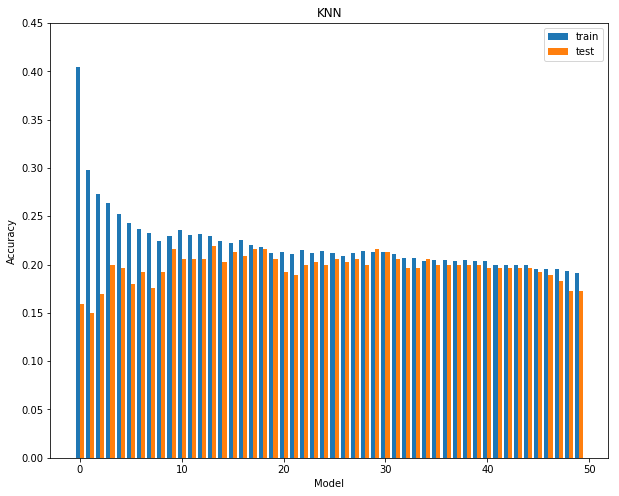

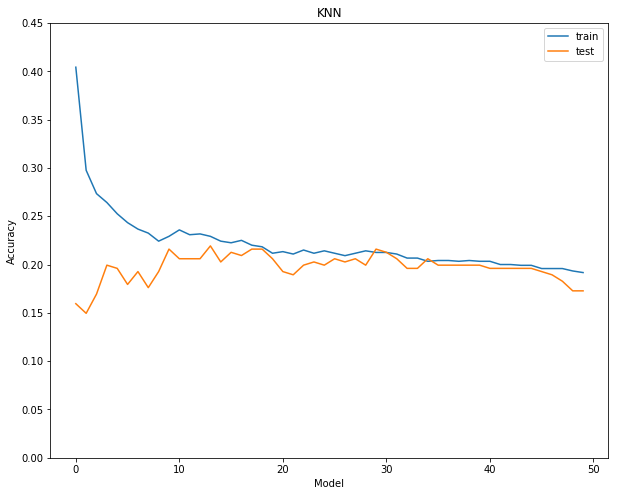

In [13]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(knn)) - 0.2, knn.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(knn)) + 0.2, knn.accuracy_test, width=0.4, align='center')
plt.title("KNN")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.45)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/KNN1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(knn)), knn.accuracy_train)
plt.plot(np.arange(len(knn)), knn.accuracy_test)
plt.title("KNN")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.45)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/KNN2.jpg")

In [14]:
max_pos = np.argmax(knn.accuracy_test.values)
print("Best accuracy on test: {}".format(knn.classifier[max_pos]))
print("Train accuracy: {}".format(knn.accuracy_train[max_pos]))
print("Test accuracy: {}".format(knn.accuracy_test[max_pos]))

Best accuracy on test: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=135, p=2,
           weights='uniform')
Train accuracy: 0.22916666666666666
Test accuracy: 0.21926910299003322


### Classification Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

accuracy_train = []
accuracy_test = []
classifier = []

for c in ['gini', 'entropy']:
    for s in ['best', 'random']:
        for min_s in np.arange(3, 10):
            DecisionTree = DecisionTreeClassifier(criterion=c, splitter = s, min_samples_split=min_s)
            fit_predict(DecisionTree)

............................

In [16]:
dt = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
dt.head()

,accuracy_train,accuracy_test,classifier
0,0.930000,0.275748,"DecisionTreeClassifier(class_weight=None, crit..."
1,0.878333,0.275748,"DecisionTreeClassifier(class_weight=None, crit..."
2,0.827500,0.282392,"DecisionTreeClassifier(class_weight=None, crit..."
3,0.780833,0.279070,"DecisionTreeClassifier(class_weight=None, crit..."
4,0.750000,0.308970,"DecisionTreeClassifier(class_weight=None, crit..."


In [17]:
for i in range(len(classifier)):
    dt_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    dt_y_predict.to_hdf("NB3_df/dt_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
dt_y_predict.head()

,pred,actual
0,9.0,19.0
1,9.0,19.0
2,0.0,19.0
3,9.0,19.0
4,18.0,19.0


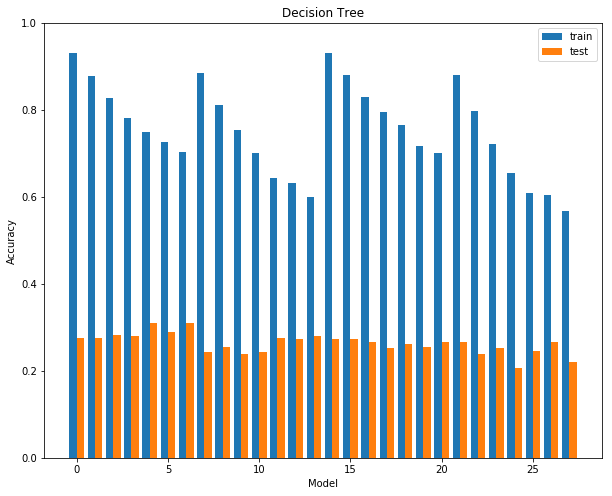

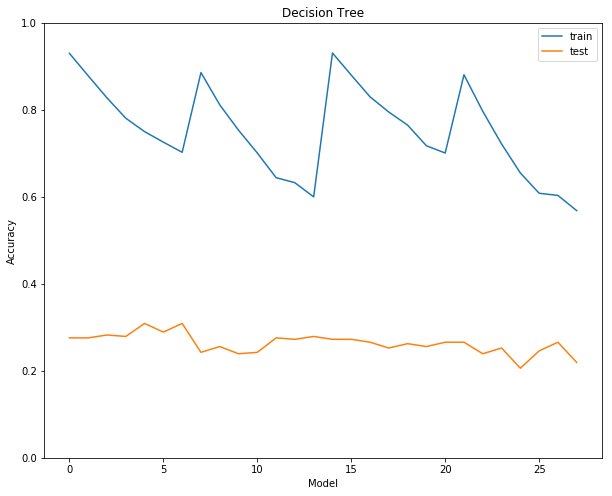

In [18]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(dt)) - 0.2, dt.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(dt)) + 0.2, dt.accuracy_test, width=0.4, align='center')
plt.title("Decision Tree")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Decision Tree1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(dt)), dt.accuracy_train)
plt.plot(np.arange(len(dt)), dt.accuracy_test)
plt.title("Decision Tree")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Decision Tree2.jpg")

In [19]:
max_pos = np.argmax(dt.accuracy_test.values)
print("Best accuracy on test: {}".format(dt.classifier[max_pos]))
print("Train accuracy: {}".format(dt.accuracy_train[max_pos]))
print("Test accuracy: {}".format(dt.accuracy_test[max_pos]))

Best accuracy on test: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Train accuracy: 0.75
Test accuracy: 0.3089700996677741


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

accuracy_train = []
accuracy_test = []
classifier = []

for n in np.arange(10, 100, 10):
    for d in np.arange(1, 5):
        RandomForest = RandomForestClassifier(n_estimators=n, max_depth=d)
        fit_predict(RandomForest)

....................................

In [21]:
rf = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
rf.head()

,accuracy_train,accuracy_test,classifier
0,0.267500,0.239203,"(DecisionTreeClassifier(class_weight=None, cri..."
1,0.260833,0.222591,"(DecisionTreeClassifier(class_weight=None, cri..."
2,0.283333,0.235880,"(DecisionTreeClassifier(class_weight=None, cri..."
3,0.352500,0.315615,"(DecisionTreeClassifier(class_weight=None, cri..."
4,0.254167,0.225914,"(DecisionTreeClassifier(class_weight=None, cri..."


In [22]:
for i in range(len(classifier)):
    rf_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    rf_y_predict.to_hdf("NB3_df/rf_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
rf_y_predict.head()

,pred,actual
0,9.0,4.0
1,9.0,4.0
2,0.0,4.0
3,9.0,4.0
4,9.0,4.0


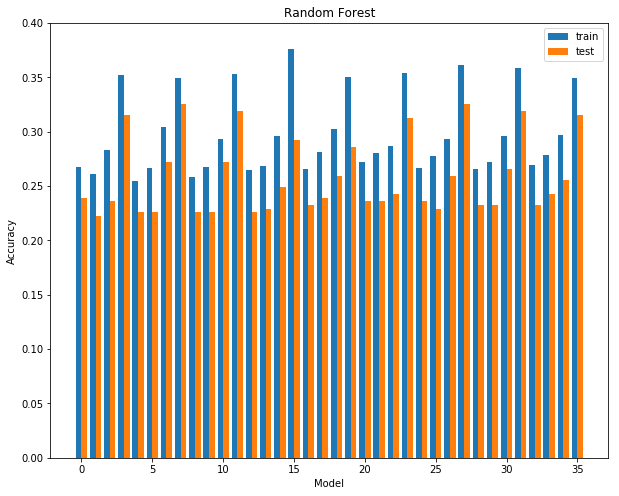

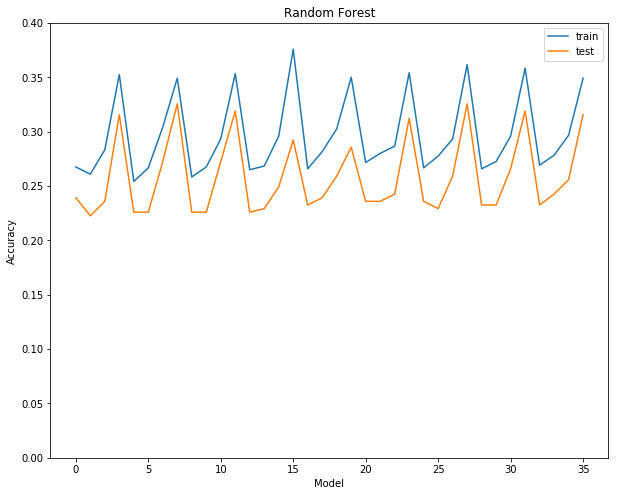

In [23]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(rf)) - 0.2, rf.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(rf)) + 0.2, rf.accuracy_test, width=0.4, align='center')
plt.title("Random Forest")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.4)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Random Forest1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(rf)), rf.accuracy_train)
plt.plot(np.arange(len(rf)), rf.accuracy_test)
plt.title("Random Forest")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.4)
plt.legend(["train", "test"])
plt.savefig("NB3_graph/Random Forest2.jpg")

In [24]:
max_pos = np.argmax(rf.accuracy_test.values)
print("Best accuracy on test: {}".format(rf.classifier[max_pos]))
print("Train accuracy: {}".format(rf.accuracy_train[max_pos]))
print("Test accuracy: {}".format(rf.accuracy_test[max_pos]))

Best accuracy on test: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Train accuracy: 0.3491666666666667
Test accuracy: 0.32558139534883723


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

train_accuracy = []
test_accuracy = []
classifier = []

for k in ['linear', 'rbf', 'sigmoid', 'rbf']:
    for c in [1, 10, 100]:
        SVM = SVC(C=c, kernel=k, random_state=42)
        fit_predict(SVM)

In [ ]:
svm = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
svm.head()

In [ ]:
for i in range(len(classifier)):
    svm_y_predict = pd.DataFrame({
        "pred": y_predict_test[i],
        "actual": y_test.iloc[i]})
    svm_y_predict.to_hdf("NB3_df/svm_y_predict" + "_c" + str(i + 1) + ".h5", "data", mode="w")
svm_y_predict.head()

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(svm)) - 0.2, svm.accuracy_train, width=0.4, align='center')
plt.bar(np.arange(len(svm)) + 0.2, svm.accuracy_train, width=0.4, align='center')

plt.title("SVM")
plt.ylabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.45)
plt.legend(["train", "test"])
plt.savefig("SVM1.jpg")

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(svm)), svm.accuracy_train)
plt.plot(np.arange(len(svm)), svm.accuracy_train)
plt.title("SVM")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 0.5)
plt.legend(["train", "test"])
plt.savefig("SVM2.jpg")

In [ ]:
max_pos = np.argmax(svm.accuracy_test.values)
print("Best accuracy on test: {}".format(random_forest.classifier[max_pos]))
print("Train accuracy: {}".format(random_forest.accuracy_train[max_pos]))
print("Test accuracy: {}".format(random_forest.accuracy_test[max_pos]))